Current Injections for Golgi_cell_2020

In [1]:
import matplotlib.pyplot as plt
from neuron import h 
from Golgi2020_morpho_1 import Golgi_morpho_1
import multiprocessing
import numpy as np

In [2]:
#Instantiation of the cell template
cell = Golgi_morpho_1(1)

#fixed time step only
Fixed_step = h.CVode()
Fixed_step.active(0)


5394 lines read


False

In [3]:
#this code discover the number of cores available in a CPU and activate the multisplit to use them all.
cpu = multiprocessing.cpu_count() //2
h.load_file("parcom.hoc")
p = h.ParallelComputeTool()
p.change_nthread(cpu,1)
p.multisplit(1)
stimdata = dict()

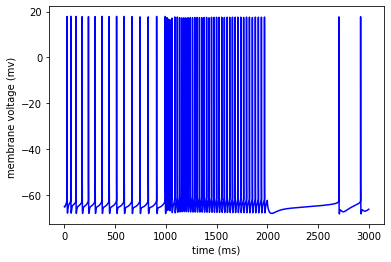

In [8]:
#Basic properties of the simulation. dt, temperature, sim duration and initial voltage
h.dt = 0.025  # change in time b etween steps (ms)
h.celsius = 32  # temperature of the neurons (*C)
h.tstop = 3000  # time to stop the entire simulation (ms)
h.v_init = -65  # intiial membrane potential (mV)
   
stimdata = [
    [1000, 1000, 0.1],  # delay, duration, amplitude
    #[1000, 1000, 0.2],
    #[1000, 1000, 0.3],
    #[1000, 1000, 0.4],
    #[1000, 1000, 0.5],
    #[1000, 1000, 0.6],
]

for i, (delay, duration, amplitude) in enumerate(stimdata):
    stim = [h.IClamp(0.5, sec=cell.soma[0])]
    stim[0].delay = delay
    stim[0].dur = duration
    stim[0].amp = amplitude

    #Initialization 
    h.finitialize()
    h.run()

    # Save the results into an image
    fig, ax = plt.subplots()
    ax.plot(np.array(cell.time_vector), np.array(cell.vm), 'b', label='spikes')
    plt.xlabel("time (ms)")
    plt.ylabel("membrane voltage (mv) ")